# Verify the date stream order in the binary file
## method: use python to visualize the raw input file and output file
>+ raw input file D:\CUHK\VolumeLIC\VolumeLIC\tornado.dat
>+ raw output fileD:\CUHK\VolumeLIC\VolumeLIC\tornado_lic.dat

In [4]:
# the packages headers and defined functions
#
#
import numpy as np
import pyvista as pv
# from pyvista.plotting.tools import opacity_transfer_function
pv.set_jupyter_backend('pythreejs') 

# no need to define the function here
# def data_filter(greys, v_m,  nmin, nmax):
#     nmin = (np.nanmax(v_m) - np.nanmin(v_m)) * nmin + np.nanmin(v_m)
#     nmax = (np.nanmax(v_m) - np.nanmin(v_m)) * nmax + np.nanmin(v_m)
#     print(np.nanmax(v_m) , np.nanmin(v_m))
#     filter = (v_m >= nmin).astype(int) * (v_m <= nmax).astype(int)
#     return greys * filter

# the input tornado
>+ **raw input file** D:\CUHK\VolumeLIC\VolumeLIC\tornado.dat

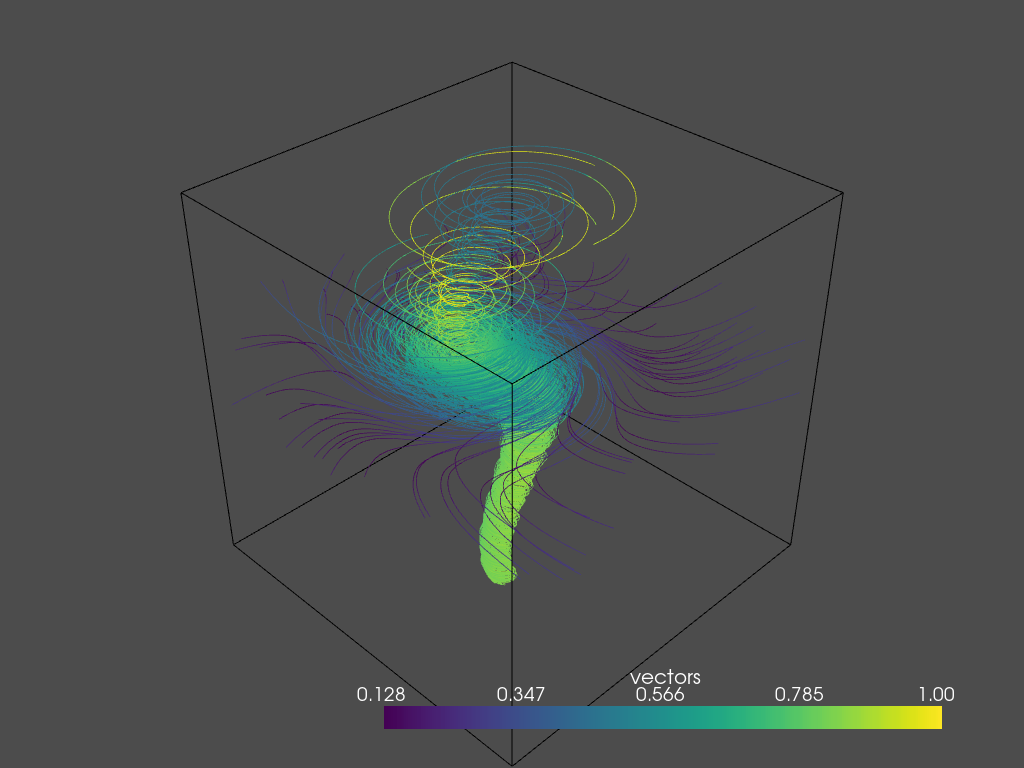

In [5]:
# arr = np.fromfile('../VolumeLIC/tornado_lic.dat', dtype=np.int8)

vector = np.fromfile(r"D:\CUHK\VolumeLIC\VolumeLIC\tornado.dat", dtype = np.float32)

mesh = pv.UniformGrid((128,128,128), (1, 1, 1), (0,0,0))
x = mesh.points[:, 0]
y = mesh.points[:, 1]
z = mesh.points[:, 2]
vectors = np.empty((mesh.n_points, 3))
vectors[:, 0] = vector.reshape(128,128,128,3)[:,:,:,0].flatten()
vectors[:, 1] = vector.reshape(128,128,128,3)[:,:,:,1].flatten()
vectors[:, 2] = vector.reshape(128,128,128,3)[:,:,:,2].flatten()

mesh['vectors'] = vectors
stream, src = mesh.streamlines('vectors', return_source=True,
                               terminal_speed=0, n_points=100,
                               source_radius=15)

#for the stream plots in the jupyter notebook the backend must be none 
pv.set_jupyter_backend('none') 

p = pv.Plotter()
p.add_mesh(mesh.outline(), color="k")
p.add_mesh(stream.tube(radius=0.1), scalars="vectors", lighting=False)
p.show()

# the output LIC plot

>+ **raw output file**  D:\CUHK\VolumeLIC\VolumeLIC\tornado_lic.dat

1.0089471 0.096016325


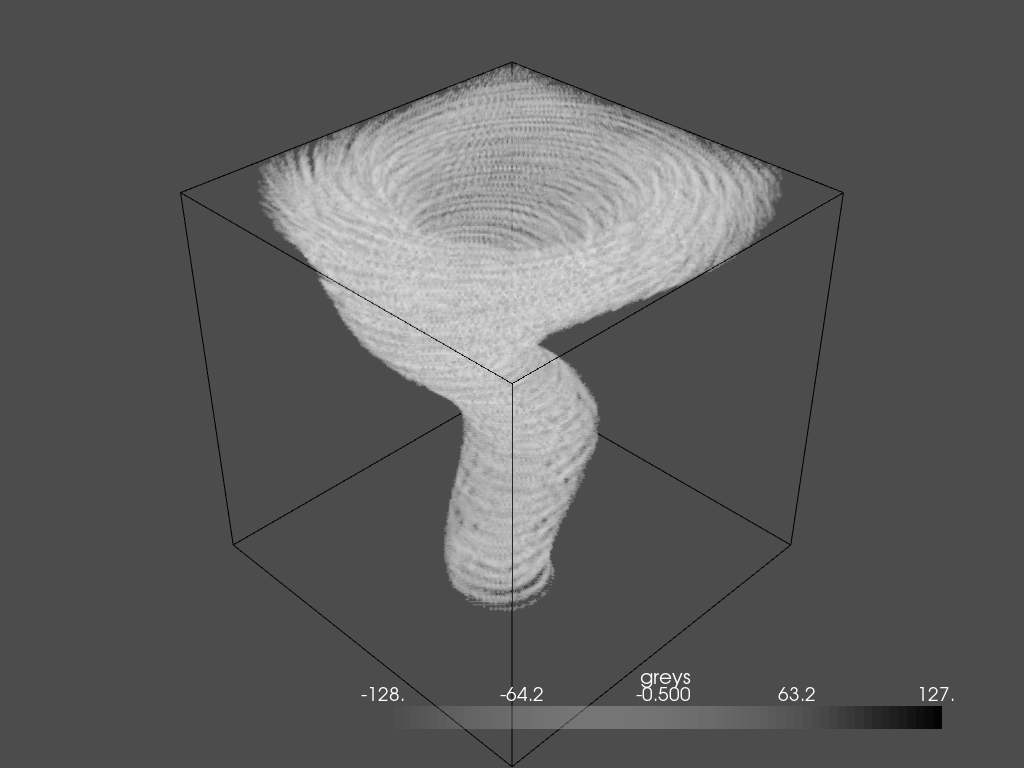

In [6]:
def data_filter(greys, v_m,  nmin, nmax):
    nmin = (np.nanmax(v_m) - np.nanmin(v_m)) * nmin + np.nanmin(v_m)
    nmax = (np.nanmax(v_m) - np.nanmin(v_m)) * nmax + np.nanmin(v_m)
    print(np.nanmax(v_m) , np.nanmin(v_m))
    filter = (v_m >= nmin).astype(int) * (v_m <= nmax).astype(int)
    return greys * filter

arr = np.fromfile(r'D:\CUHK\VolumeLIC\VolumeLIC\tornado_lic.dat', dtype=np.int8)
vector = np.fromfile(r"D:\CUHK\VolumeLIC\VolumeLIC/tornado.dat", dtype = np.float32)
v_x = vector.reshape(128,128,128,3)[:,:,:,0]
v_y = vector.reshape(128,128,128,3)[:,:,:,1]
v_z = vector.reshape(128,128,128,3)[:,:,:,2]

v_m = np.sqrt(v_x**2 + v_y**2 + v_z**2).flatten()


# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape + 1 because we want to inject our values on
#   the CELL data
grid.dimensions = np.array((128,128,128))

# Edit the spatial reference
grid.origin = (0, 0, 0)  # The bottom left corner of the data set
grid.spacing = (1, 1, 1)  # These are the cell sizes along each axis
grid.point_data["greys"] = data_filter(arr, v_m, 0.5, 0.9) # filter the array!

# also not support the backend and I don't know why
pv.set_jupyter_backend('none') 

p = pv.Plotter()
p.add_mesh(grid.outline(), color="k")
p.add_volume(grid, cmap="Greys")
p.show()

# Convert the hdf5 to a binary file
> + follow the above order to reproduce

In [7]:
import h5py
import numpy as np


struct_num = '03'
snap_num = '38'

h5_in = h5py.File(f'D:\CUHK\Data_from_zcao\struct{struct_num}_snap{snap_num}.h5', 'r')
# list(h5_in.keys())
B_i = np.array(h5_in['i_mag_field'])
B_j = np.array(h5_in['j_mag_field'])
B_k = np.array(h5_in['k_mag_field'])
B_v = np.stack((B_i, B_j, B_k), axis = -1)


print(B_v.shape)
# B_x = B_v[:,:,:,0]
# B_y = B_v[:,:,:,1]
# B_z = B_v[:,:,:,2]
# print(((B_x == B_i).all() and (B_y == B_j).all() and (B_z == B_k)).all()) # it should be true all the time

data_in_bin = np.array(B_v, dtype = np.float64)
with open(f'D:/CUHK/VolumeLIC/VolumeLIC/struct{struct_num}_snap{snap_num}_shape{B_i.shape[0]}_{B_i.shape[1]}_{B_i.shape[2]}.bin','wb') as f:
    f.write(data_in_bin)
    print("hdf5 to binary complete!")



OSError: Unable to open file (unable to open file: name = 'D:\CUHK\Data_from_zcao\struct03_snap38.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

# Run the C++ code to produce LIC binary file
> + the input file is in the same folder/current folder
> + the output file is in the upper level folder/parent folder

# Plot the LIC
> + use the LICplot.py to make the image, which can support the camera rotation

Transforming point data into cell data: 100%|██████████[00:00<00:00]

(31, 130, 25)
22.27344305137411 2.7047006622397283


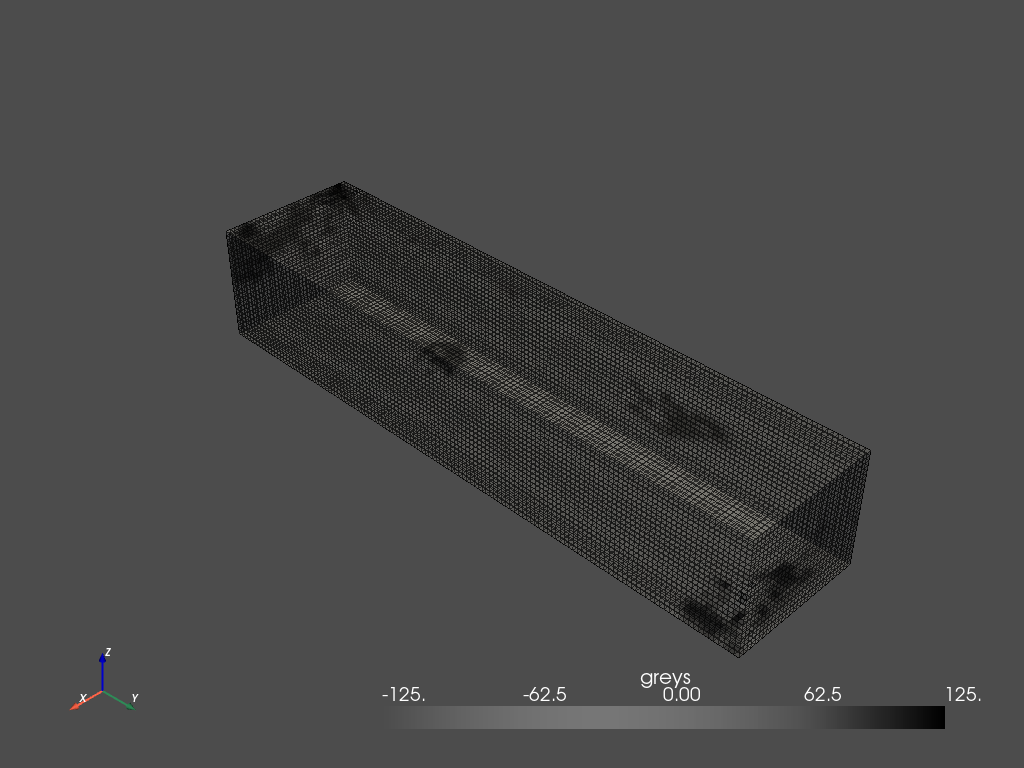

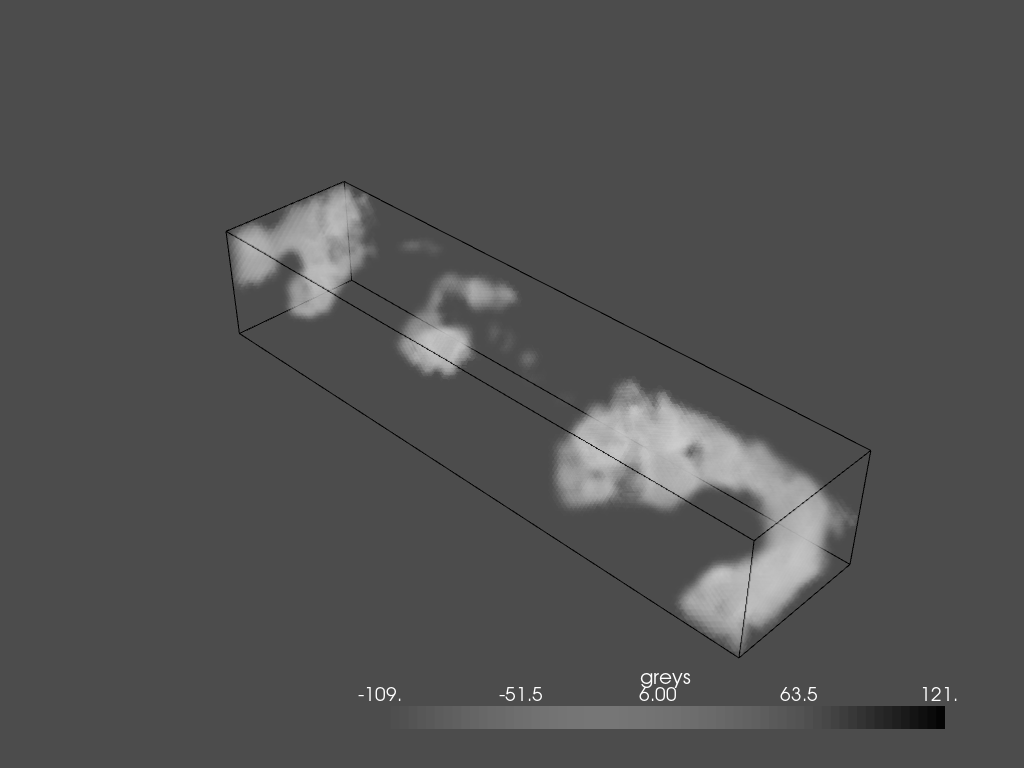

In [ ]:
import numpy as np
import pyvista as pv
from pyvista.plotting.tools import opacity_transfer_function
# pv.set_jupyter_backend('pythreejs') 

def data_filter(greys, v_m,  nmin, nmax):
    nmin = (np.nanmax(v_m) - np.nanmin(v_m)) * nmin + np.nanmin(v_m)
    nmax = (np.nanmax(v_m) - np.nanmin(v_m)) * nmax + np.nanmin(v_m)
    print(np.nanmax(v_m) , np.nanmin(v_m))
    filter = (v_m >= nmin).astype(int) * (v_m <= nmax).astype(int)
    return greys * filter

 

arr = np.fromfile('../VolumeLIC/lic_struct03_snap38_shape31_130_25.bin', dtype=np.int8)
vector = np.fromfile("../VolumeLIC/VolumeLIC/struct03_snap38_shape31_130_25.bin", dtype = np.float64)
v_x = vector.reshape(31, 130, 25, 3)[:, :, :, 0]
v_y = vector.reshape(31, 130, 25, 3)[:, :, :, 1]
v_z = vector.reshape(31, 130, 25, 3)[:, :, :, 2]
print(v_x.shape)
v_m = np.sqrt(v_x**2 + v_y**2 + v_z**2).flatten()


# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape + 1 because we want to inject our values on
#   the CELL data
grid.dimensions = np.array((31,130,25))

# Edit the spatial reference
grid.origin = (0, 0, 0)  # The bottom left corner of the data set
grid.spacing = (1, 1, 1)  # These are the cell sizes along each axis




# Add the data values to the cell data
grid.point_data["greys"] = data_filter(arr, v_m, 0.5, 0.9) # Flatten the array!
# grid.point_data["greys"] = arr+128 # Flatten the array!



# Now plot the grid!
grid = grid.point_data_to_cell_data(progress_bar = 1)

grid.plot(show_edges=True, cmap = "Greys", opacity = 'linear')

p = pv.Plotter()
p.add_mesh(grid.outline(), color="k")
p.add_volume(grid, cmap= 'Greys')
p.show()

